In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
df_taylor=pd.read_excel('Taylor_Creek.xlsx')
df_middle=pd.read_excel('Middle_loup.xlsx')
df_taylor=df_taylor.dropna()
df_middle=df_middle.dropna()

In [41]:
df_taylor.head()

,Date,Discharge
0,04-10-2015,16.2
1,05-10-2015,16.1
2,06-10-2015,15.7
3,07-10-2015,20.3
4,08-10-2015,19.9


In [42]:
df_taylor['Date']=pd.to_datetime(df_taylor['Date'])

In [43]:
df_middle['Date']=pd.to_datetime(df_middle['Date'])

In [44]:
df_taylor.dtypes

Date         datetime64[ns]
Discharge           float64
dtype: object

In [45]:
df_middle.dtypes

Date         datetime64[ns]
Discharge             int64
dtype: object

In [46]:
df_taylor['runoff']=(df_taylor['Discharge']*(2.832*(10**7)*60*60*24))/(4.458*(10**13))

In [47]:
df_middle['runoff']=(df_middle['Discharge']*(2.832*(10**7)*60*60*24))/(2.046*(10**14))

In [48]:
df_taylor.head()

,Date,Discharge,runoff
0,2015-04-10,16.2,0.889164
1,2015-05-10,16.1,0.883675
2,2015-06-10,15.7,0.861721
3,2015-07-10,20.3,1.114200
4,2015-08-10,19.9,1.092245


In [49]:
df_middle.head()

,Date,Discharge,runoff
0,2015-04-10,499,5.967630
1,2015-05-10,483,5.776283
2,2015-06-10,492,5.883916
3,2015-07-10,494,5.907834
4,2015-08-10,497,5.943712


In [50]:
df_taylor=df_taylor.sort_values(by='runoff')
df_taylor.head()

,Date,Discharge,runoff
20,2015-10-24,15.4,0.845255
2,2015-06-10,15.7,0.861721
21,2015-10-25,15.8,0.867209
1,2015-05-10,16.1,0.883675
0,2015-04-10,16.2,0.889164


In [51]:
df_middle=df_middle.sort_values(by='runoff')
df_middle.head()

,Date,Discharge,runoff
924,2018-04-15,350,4.185713
480,2017-01-26,385,4.604284
925,2018-04-16,386,4.616243
481,2017-01-27,387,4.628202
483,2017-01-29,417,4.986978


In [52]:
df_taylor=df_taylor.assign(n= range(1,len(df_taylor)+1,1))

In [53]:
df_taylor.head()

,Date,Discharge,runoff,n
20,2015-10-24,15.4,0.845255,1
2,2015-06-10,15.7,0.861721,2
21,2015-10-25,15.8,0.867209,3
1,2015-05-10,16.1,0.883675,4
0,2015-04-10,16.2,0.889164,5


In [54]:
df_middle=df_middle.assign(n= range(1, len(df_middle)+1,1))
df_middle.head()

,Date,Discharge,runoff,n
924,2018-04-15,350,4.185713,1
480,2017-01-26,385,4.604284,2
925,2018-04-16,386,4.616243,3
481,2017-01-27,387,4.628202,4
483,2017-01-29,417,4.986978,5


In [55]:
df_taylor['ep']=df_taylor['n']/(len(df_taylor)+1)
df_middle['ep']=df_middle['n']/(len(df_middle)+1)

In [56]:
df_taylor.tail()

,Date,Discharge,runoff,n,ep
44,2015-11-17,497.0,27.278678,1082,0.99540
528,2017-03-15,500.0,27.443338,1083,0.99632
65,2015-08-12,614.0,33.700419,1084,0.99724
41,2015-11-14,665.0,36.499639,1085,0.99816
66,2015-09-12,1010.0,55.435542,1086,0.99908


In [57]:
df_middle.tail()

,Date,Discharge,runoff,n,ep
201,2016-04-22,676,8.084405,1093,0.995446
215,2016-06-05,683,8.168119,1094,0.996357
200,2016-04-21,686,8.203997,1095,0.997268
214,2016-05-05,710,8.491017,1096,0.998179
682,2017-08-16,738,8.825874,1097,0.999089


Text(0.5,1,'Flow Duration Curve for Taylor Creek')

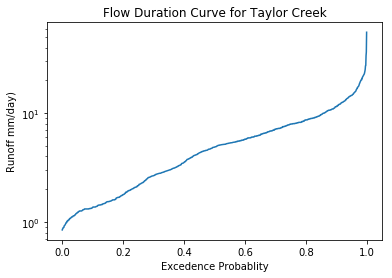

In [63]:
fig=plt.figure()
plt.plot(df_taylor['ep'],df_taylor['runoff'])
plt.yscale('log')
plt.xlabel('Excedence Probablity')
plt.ylabel('Runoff mm/day)')
plt.title('Flow Duration Curve for Taylor Creek')

Text(0.5,1,'Flow Duration Curve for Middle Creek')

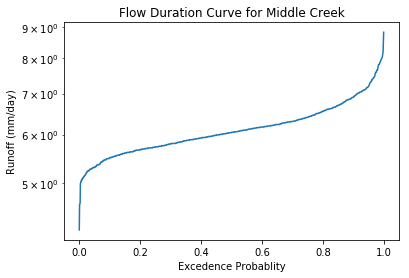

In [64]:
fig1=plt.figure()
plt.plot(df_middle['ep'],df_middle['runoff'])
plt.yscale('log')
plt.xlabel('Excedence Probablity')
plt.ylabel('Runoff (mm/day)')
plt.title('Flow Duration Curve for Middle Creek')

In [65]:
print(np.percentile(df_middle['runoff'],25))
print(np.percentile(df_middle['runoff'],75))

5.728446686217009
6.398160703812318


In [66]:
print(np.percentile(df_taylor['runoff'],25))
print(np.percentile(df_taylor['runoff'],75))

2.1625350201884252
7.903681292059219


In [ ]:
slope_taylor,intercept_taylor=np.polyfit(df_taylor['ep'],df_taylor['r'])